<a href="https://colab.research.google.com/github/swingdancer777/Credit-Card-Default-Analysis-Project/blob/main/Credit_Card_Default_Data_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
### Performing data cleaning, data analysis, data visualization, and machine learning classification on a credit card default dataset

# Dataset

This dataset holds information on credit card user demographic attributes, credit data, history of payment, bill statements, and default payments, of 30,000 credit card clients in Taiwan from April 2005 to September 2005.

# Variables
There are 25 variables:

 ID: ID of each client
 
 LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
 
 SEX: Gender (1=male, 2=female)
 
 EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
 
 MARRIAGE: Marital status (1=married, 2=single, 3=others)
 
 AGE: Age in years
 
 PAY_0: Repayment status in September, 2005 (-1=pay on time, 1=payment delay for one month, 2=payment delay for two months, ... 
 8=payment delay for eight months, 9=payment delay for nine months and above)
 
 PAY_2: Repayment status in August, 2005 (scale same as above)
 
 PAY_3: Repayment status in July, 2005 (scale same as above)
 
 PAY_4: Repayment status in June, 2005 (scale same as above)
 
 PAY_5: Repayment status in May, 2005 (scale same as above)
 
 PAY_6: Repayment status in April, 2005 (scale same as above)
 
 BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
 
 BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
 
 BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
 
 BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
 
 BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
 
 BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
 
 PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
 
 PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
 
 PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
 
 PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
 
 PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
 
 PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
 
 default.payment.next.month: Default payment (1=yes, 0=no)

# Load libraries

In [4]:
!pip install catboost
!pip install lightgbm

     |████████████████████████████████| 66.3MB 57kB/s 


In [5]:
import pandas as pd # for data processing, CSV file input/output (eg, pd.read_csv) 
import numpy as np  # for linear algebra 
import matplotlib   # for graphing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import gc  # garbage collection for memory mgmt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier  # converts categorical values into numbers
import lightgbm as lgb # This is a gradient boosting method that uses tree-based learning algorithms
import xgboost as xgb  # Extreme Gradient Boosting that is a decision-tree-based ensemble ML algorithm

pd.set_option('display.max_columns', 100)

In [10]:
RFC_METRIC = 'gini'  # metric used for the Random Forest Classifier
NUM_ESTIMATORS = 100 # number of estimators used for the random forest
NO_JOBS = 4          # number of random forest jobs to run in parallel

# VALIDATION SAMPLE
VALID_SIZE = 0.20  # hold back 20% of the sample for testing

# CROSS-VALIDATION
NUMBER_KFOLDS = 5 # number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000    # number of Light Gradient Boost rounds
EARLY_STOP = 50      # stop early after 50 LGB rounds
OPT_ROUNDS = 1000    # Adjust after finding the optimal number of validation rounds
VERBOSE_EVAL = 50    # Print out the metric result


#Read the data

In [11]:
# The data is stored here:
url = 'https://raw.githubusercontent.com/swingdancer777/Credit-Card-Default-Analysis-Project/main/UCI_Credit_Card.csv'

# Read the CSV data into a dataframe
credit_df = pd.read_csv(url)

# Examine the data

In [12]:
# Determine the number of rows and columns in the dataset
print("UCI Credit Card Default data - rows:", credit_df.shape[0], " columns:", credit_df.shape[1])

UCI Credit Card Default data - rows: 30000  columns: 25


In [14]:
# Look at the first few row of data to get a sense of the data
credit_df.head(7)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [15]:
# Look at summary statistics for the dataset
# Rounded to two decimals here to be easier to read
# round(credit_df.describe(),2)  # alternate syntax
credit_df.describe().round(2)  

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,1.15,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


In [16]:
# The New Taiwan Dollar to US Dollar exchange rate in April 2005 was around 31:1.
# Show the data in terms of USD for context.
# Drop columns and rows that should not be divided by the exchange rate (ie, ID, sex, education, marriage, age, count).
exchg_rate = 31
USD_credit_df = credit_df.drop(['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6','default.payment.next.month'], axis=1)
summary_USD_credit_df = USD_credit_df.describe()
summary_USD_credit_df2 = summary_USD_credit_df.drop(['count'], axis=0)
(summary_USD_credit_df2/exchg_rate).round(2)

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
mean,5402.72,1652.37,1586.42,1516.55,1395.58,1300.37,1253.93,182.70,191.01,168.57,155.68,154.82,168.24
std,4185.41,2375.35,2295.93,2237.08,2075.25,1961.20,1921.10,534.30,743.25,567.97,505.36,492.85,573.47
min,322.58,-5341.29,-2250.87,-5073.03,-5483.87,-2623.68,-10954.94,0.00,0.00,0.00,0.00,0.00,0.00
25%,1612.90,114.80,96.28,86.01,75.06,56.87,40.52,32.26,26.87,12.58,9.55,8.15,3.80
50%,4516.13,721.98,683.87,648.02,614.58,584.02,550.68,67.74,64.81,58.06,48.39,48.39,48.39
75%,7741.94,2164.23,2064.72,1940.80,1758.26,1619.05,1587.04,161.48,161.29,145.32,129.46,130.05,129.03
max,32258.06,31113.26,31739.71,53680.29,28760.84,29908.74,31021.42,28179.10,54330.94,28904.52,20032.26,13759.00,17053.74


#Describe the data in words

These data are of credit card users in Taiwan from April 2005 - Sept 2005.
The New Taiwan Dollar (NTD) to US Dollar (USD) exchange rate was about 31 NTD to 1 USD in April 2005.

There are 30,000 credit lines.

The average credit limit is USD 5402 / NTD 167,484.

The average credit card bill amount ranged from USD 1254 to 1652 / NTD 38,871 to 51,223.

The average payment amount ranged from USD 154 to 191 / NTD 4799 to 5921.

Most of the users have a university or graduate level education.

Most of the users are married or single.

The average age is 35.5 years, and the middle 50% of the population ranges from 21 years to 41 years old.

For "default payment", "0" means "no default" and "1" means "default". The average is 0.22, which indicates that 22% of credit card users will default in the next month. This will be verified in this examination.


### Check for missing data 

Use the original dataset in New Taiwan Dollars to check

In [17]:
total_values = credit_df.isnull().sum().sort_values(ascending = False)
percent_of_total = (credit_df.isnull().sum()/credit_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total_values, percent_of_total], axis=1, keys=['Total_Value', 'Percent_of_Total']).transpose()

,default.payment.next.month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total_Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent_of_Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the credit payment data set.

### Check for imbalanced data

**default.payment.next.month** is the target result, so we will check for imbalanced data in this value.

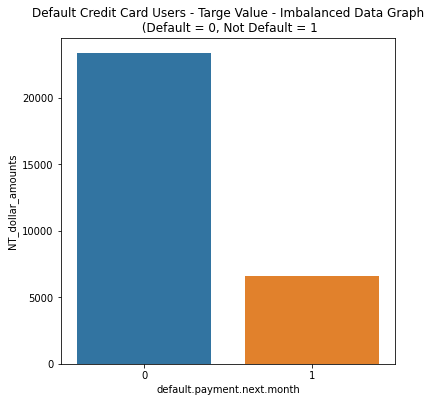

In [18]:
# count the number of "next month default payments" that are defaults and that are not
temp_df = credit_df['default.payment.next.month'].value_counts() 
df1 = pd.DataFrame({'default.payment.next.month': temp_df.index, 'NT_dollar_amounts': temp_df.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Users - Targe Value - Imbalanced Data Graph\n (Default = 0, Not Default = 1')
sns.set_color_codes('deep')
sns.barplot(x = 'default.payment.next.month', y = 'NT_dollar_amounts', data = df1)
locs, labels = plt.xticks()
plt.show()

In [19]:
expected_default_pct = credit_df['default.payment.next.month'].mean()
print("Expected/average percentage of defaults next month:", expected_default_pct)
print("Expected/average number of defaults next month:", expected_default_pct*30000)

Expected/average percentage of defaults next month: 0.2212
Expected/average number of defaults next month: 6636.0


Out of 30,000 credit card users, 6636 (which is 22.12%) are expected to default next month.
This number seems sufficiently large compared to the total, so the 'default.payment.next.month' value is not significantly imbalanced.

# Exploratory Data Analysis

### Credit limit amount


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


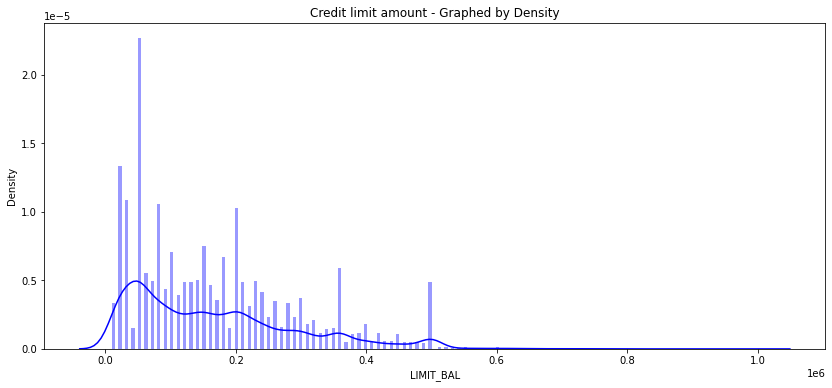

In [20]:
plt.figure(figsize = (14,6))
plt.title('Credit limit amount - Graphed by Density')
sns.set_color_codes("deep")
sns.distplot(credit_df['LIMIT_BAL'], kde=True, bins=200, color="blue")  #kde = True means to plot the gaussian kernl density estimate
plt.show()

The credit limit that has been granted the most to users is NTD 50,000. This will be verified.

In [21]:
credit_df['LIMIT_BAL'].value_counts().shape

(81,)

The "credit limit" variable has 81 unique values.

In [22]:
credit_df['LIMIT_BAL'].value_counts().head(7)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
150000.0    1110
100000.0    1048
Name: LIMIT_BAL, dtype: int64

The largest number of credit cards (3365) has a limit of NTD 50,000.

The second largest number of credit cards (1976) has a limit of NTD 20,000.

The third largest number of credit cards (1610) has a limit of NTD 30,000.

# Credit limit amounts grouped by default payment next month

Now we visualize the density plot for amount of credit limit (LIMIT_BAL), grouped by default payment next month.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


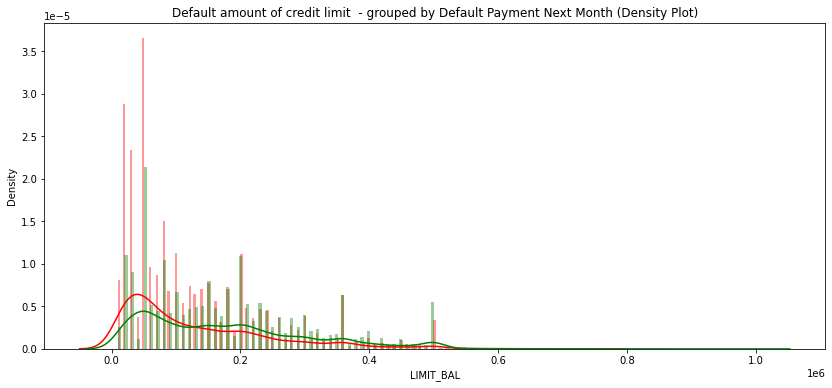

In [23]:
class_0 = credit_df.loc[credit_df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = credit_df.loc[credit_df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Default Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

In the density graph above, accounts that default are graphed in red. Accounts that do not are graphed in green. We see that most defaults happen to credit limits up to NTD 100,000 ("0.1" on the graph). We also see that the density for defaulting accounts is higher than for non-defaulting accounts. Finally, the credit limits of NTD 20,000, NTD 30,000, and NTD 50,000 are also high (shown by large red lines).

# Credit limit vs gender

Now we examine the distribution of credit compared to gender. For gender, "1" is male and "2" is female.

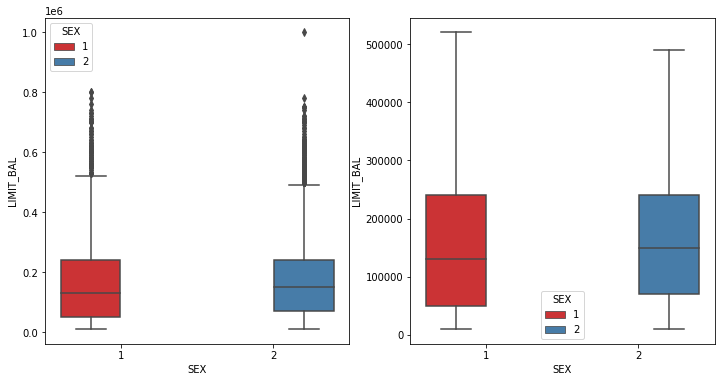

In [28]:
fig, (axis1, axis2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = axis1, x="SEX", y="LIMIT_BAL", hue="SEX",data=credit_df, palette="Set1",showfliers=True)
s = sns.boxplot(ax = axis2, x="SEX", y="LIMIT_BAL", hue="SEX",data=credit_df, palette="Set1",showfliers=False)
plt.show();

# Correlation of variables
Let's check the correlation between the numeric variables.

Let's examine the correlation among the "Amount of bill statement" values from April to September 2005.

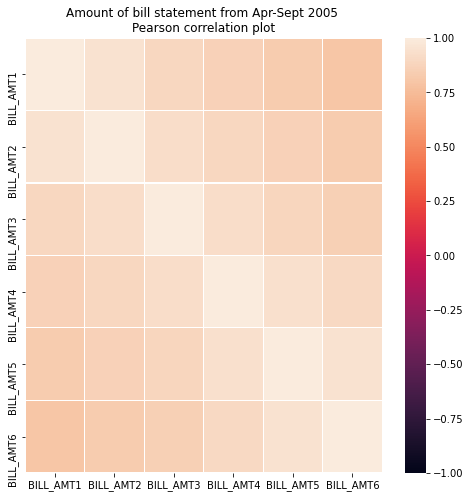

In [52]:
variables = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement from Apr-Sept 2005 \nPearson correlation plot')
correlation = credit_df[variables].corr()
sns.heatmap(correlation, xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

From the heatmap, we see that as the months get farther apart, their correlation decreases. For example, the highest correlations are between September and August (BILL_AMT1 and BILL_AMT2), and the lowest correlations are between September and April (BILL_AMT1 and BILL_AMT6).

Now let's examine the correlation between "Amount of previous payment" for April to September 2005.

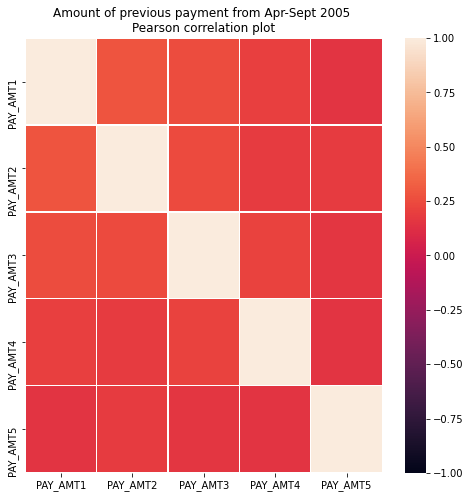

In [55]:
variables1 = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

cmap = sns.cm.rocket_r
plt.figure(figsize = (8,8))
plt.title('Amount of previous payment from Apr-Sept 2005 \nPearson correlation plot')
correlation1 = credit_df[variables1].corr()
sns.heatmap(correlation1,xticklabels=correlation1.columns,yticklabels=correlation1.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

We see that the correlation is zero between amount of previous payments for April to September 2005.

Now let's examine the correlation between Repayment status for April to September 2005.

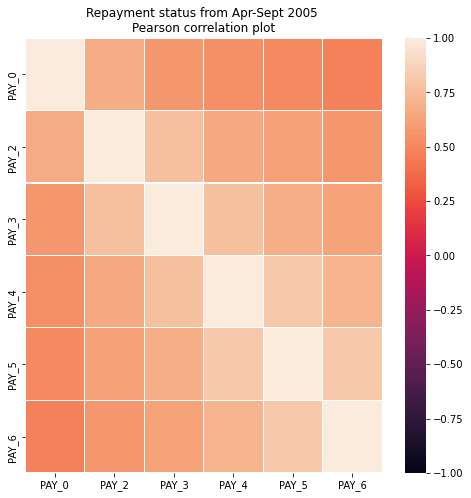

In [60]:
variables2 = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status from Apr-Sept 2005 \nPearson correlation plot')
correlation2 = credit_df[variables2].corr()
sns.heatmap(correlation2,xticklabels=correlation2.columns,yticklabels=correlation2.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

From the heatmap, again we see that as the months get farther apart, their correlation decreases. For example, again the highest correlations are between September and August (BILL_AMT1 and BILL_AMT2), and the lowest correlations are between September and April (BILL_AMT1 and BILL_AMT6).

# Marriage, Age, Education, and Gender Variables

Now we examine the distributions for the demographic variables marriage, age, education, and gender.

First we will look at age distribution in terms of marital status and gender.

Marital status key:
0 = Unknown,
1 = Married,
2 = Single,
3 = Other

Gender key:
1 = Male,
2 = Female

In [61]:
def boxplot_variation(variable1, variable2, variable3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=variable1, y=variable2, hue=variable3,
                data=credit_df, palette="Set1",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

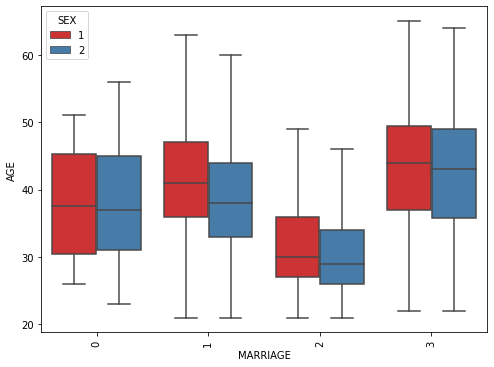

In [62]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

The boxplots show that Married Males have a higher average age than Married Women. Single Males also have a higher average age than Single Women, but the average ages are closer. The 3rd and 4th quartile ages for Married Men are higher than those same values for Married Women.

Married Status 3 ("Other") has average ages in the mid-40s and 4th quartile ages over 60. This suggests that these individuals are divorced or widowed. Married Status 0 ("Unknown") could be "not specified" or "divorced", since the first quartile ages are higher than the same quartile for Married Men and Married Women.

Now we let's examine age distribution in terms of education and marriage.

Education key:

1 = Graduate school

2 = University or college

3 = High school

4 = Other

5 = Unknown

6 = Unknown

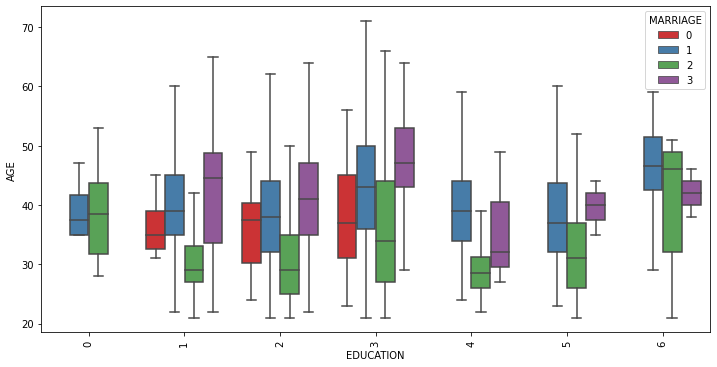

In [63]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

# Credit limit, age, and gender

Now let's examine boxplots with "Credit amount limit" in terms of age and gender.

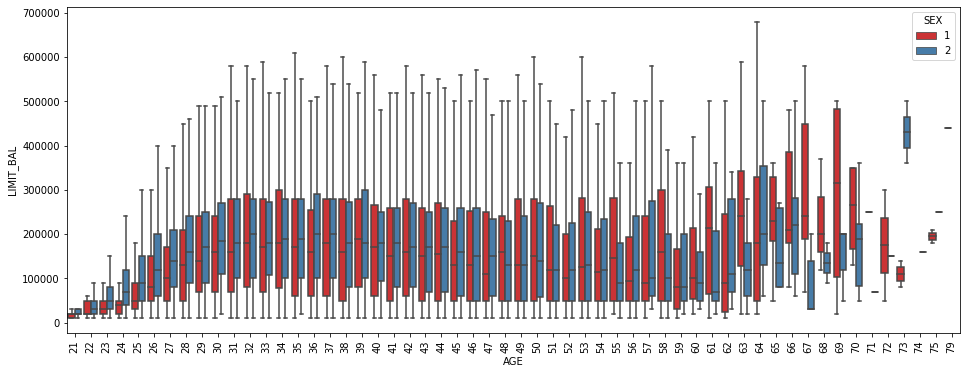

In [64]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

For Males and Females, the average, 3rd quartile and 4th quartile credit limits increase as age increases until about age 35. After this age, the credit limits vary. The credit limit reaches a maximum for Males, age 64, at nearly NTD 700,000.

For Males, the average credit limit is lower than for Females until around age 60, though there are exceptions at age 39 and 48. After age 60, the average credit limit for Males is generally greater than for Females.

# Credit limit, marriage status, and gender

Now let's examine boxplots with "Credit amount limite" in terms of marital status and gender.

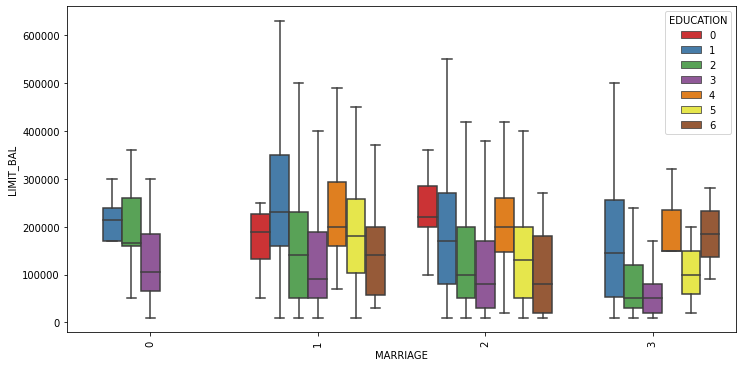

In [65]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

# Predictive models

### Define independent variables and the dependent variable

Now let us define the independent and dependent variables.

In [66]:
dep_var = 'default.payment.next.month'
indep_var = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

### Split the data into a training and testing set

We define the training and testing datasets.

Then we copy the training and testing datasets for later use.

In [67]:
train_data, test_data = train_test_split(credit_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

# Random Forest Model

We will run a Random Forest Model with the training data to train the model. Then we will use the test data to see how good the model is.

### Testing Metric
The testing metric we will use is the Gini measure. The Gini measure is the probability that a randomly selected sample from a node will be incorrectly classified based on the distribution of samples in the node.

The random forest model will try to minimize this measure when splitting each node.

Number of estimators will be = 100
Number of parallel jobs will be = 4

Let's initialize the Random Forest Classifier.

In [68]:
RFC = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Train the Random Forest Classifier using the "fit" function and the training dataset

In [69]:
RFC.fit(train_data[indep_var], train_data[dep_var].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

Predict the dependent variable values with the "predict" function using the test data set.

In [70]:
RFC_predictions = RFC.predict(test_data[indep_var])

Visualize the independent variables to see their order of importance.

### Importance of independent variables

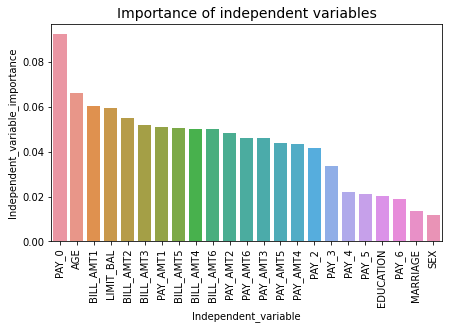

In [74]:
indep_var_importance = pd.DataFrame({'Independent_variable': indep_var, 'Independent_variable_importance': RFC.feature_importances_})
indep_var_importance = indep_var_importance.sort_values(by='Independent_variable_importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Importance of independent variables',fontsize=14)
s = sns.barplot(x='Independent_variable',y='Independent_variable_importance',data=indep_var_importance)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

Based on the chart, the most important independent variablese are 

-Repayment status in Sept 2005 (PAY_0)

-Age (AGE)

-Amount of credit card bill in Sept 2005 (BILL_AMT1)

-Credit limit (LIMIT_BAL) 

-Amount of credit card bill in Aug 2005 (BILL_AMT2)

-Amount of credit card bill in July 2005 (BILL_AMT3)

### Confusion matrix

Let's examine a confusion matrix for our results

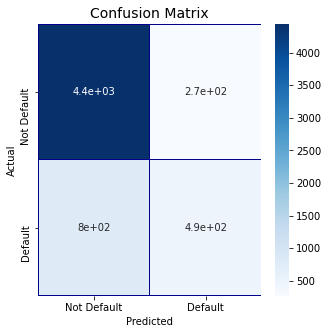

In [76]:
conf_mtrx = pd.crosstab(test_data[dep_var].values, RFC_predictions, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(conf_mtrx, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Let's also determine the Area Under Curve - Receiver Operator Characteristic curve (AUC ROC) score.

In [77]:
roc_auc_score(test_data[dep_var].values, RFC_predictions)

0.6625018741566295

The Random Forest Classifier has an AUC ROC score of 0.66. The AUC ROC score indicates how well the Random Forest Model can tell the difference between different classes of items, in this case, if a credit card holder will default on their next payment. The higher the AUC ROC score, the better.

For context, an AUC score of 0.5 suggests a model cannot tell the difference between groups. A score of 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is excellent, and higher than 0.9 is outstanding.

Since our model has an AUC ROC score of 0.66, it still needs to be improved. But now we have a base to start from!

# Summary & Conclusions

In this credit card default project we did the following:

1. Investigated credit card payment data for 30,000 card holders from April to September 2005

2. Checked to see if the data was imbalanced

3. Visualized the independent variables

4. Gained a better understanding of the relationship among the independent and dependent variables

5. We then investigated the predictive power of the Random Forest Classifier model. We obtained an AUC ROC score of 0.66. This is considered low, so the model can still be refined. Our current model provides a starting point to improve the model.